<a href="https://colab.research.google.com/github/ckraju/kvasu/blob/master/dogsncats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

In [0]:
zip_id = '1DKXFeRjmRXDReZswXOg1V_gSXtHljLg-'

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')


In [0]:
# 2. Download Zip
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('breeds.zip')

In [0]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('breeds.zip', 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

Uncompressing zip file


In [0]:
boston_dir = os.path.join('tmp/breeds/train/boston')
bullmastiff_dir = os.path.join('tmp/breeds/train/bullmastiff')
scissors_dir = os.path.join('tmp/breeds/train/chow')

print('total training boston images:', len(os.listdir(boston_dir)))
print('total training bullmastiff images:', len(os.listdir(bullmastiff_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

boston_files = os.listdir(boston_dir)
print(boston_files[:10])

bullmastiff_files = os.listdir(bullmastiff_dir)
print(bullmastiff_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training boston images: 181
total training bullmastiff images: 155
total training scissors images: 196
['n02096585_2379-35.jpg', 'n02096585_2379-12.jpg', 'n02096585_2379-135.jpg', 'n02096585_2379-95.jpg', 'n02096585_2379-72.jpg', 'n02096585_2379-141.jpg', 'n02096585_2379-38.jpg', 'n02096585_2379-0.jpg', 'n02096585_2379-147.jpg', 'n02096585_2379-48.jpg']
['n02108422_1445-1.jpg', 'n02108422_1445-2.jpg', 'n02108422_1445-12.jpg', 'n02108422_1445-110.jpg', 'n02108422_1445-23.jpg', 'n02108422_1445-18.jpg', 'n02108422_1445-41.jpg', 'n02108422_1445-83.jpg', 'n02108422_1445-138.jpg', 'n02108422_1445-65.jpg']
['n02112137_6709-7.jpg', 'n02112137_6709-126.jpg', 'n02112137_6709-94.jpg', 'n02112137_6709-11.jpg', 'n02112137_6709-4.jpg', 'n02112137_6709-43.jpg', 'n02112137_6709-26.jpg', 'n02112137_6709-175.jpg', 'n02112137_6709-133.jpg', 'n02112137_6709-138.jpg']


(300, 300, 3)


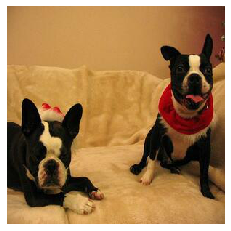

(300, 300, 3)


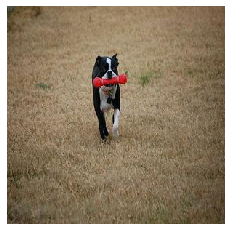

(300, 300, 3)


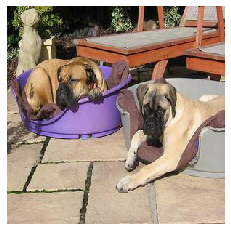

(300, 300, 3)


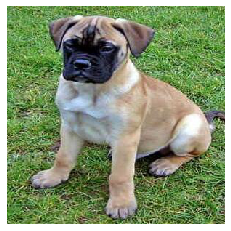

(300, 300, 3)


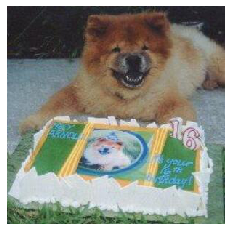

(300, 300, 3)


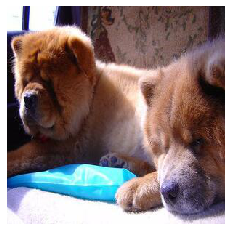

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_boston = [os.path.join(boston_dir, fname) 
                for fname in boston_files[pic_index-2:pic_index]]
next_bullmastiff = [os.path.join(bullmastiff_dir, fname) 
                for fname in bullmastiff_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_boston+next_bullmastiff+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  print (img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
# Over to test data for validation
boston_dir = os.path.join('tmp/breeds/test/boston')
bullmastiff_dir = os.path.join('tmp/breeds/test/bullmastiff')
scissors_dir = os.path.join('tmp/breeds/test/chow')

print('total testing boston images:', len(os.listdir(boston_dir)))
print('total testing bullmastiff images:', len(os.listdir(bullmastiff_dir)))
print('total testing scissors images:', len(os.listdir(scissors_dir)))

boston_files = os.listdir(boston_dir)
print(boston_files[:10])

bullmastiff_files = os.listdir(bullmastiff_dir)
print(bullmastiff_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total testing boston images: 99
total testing bullmastiff images: 99
total testing scissors images: 99
['n02096585_2379-35.jpg', 'n02096585_2379-12.jpg', 'n02096585_2379-95.jpg', 'n02096585_2379-72.jpg', 'n02096585_2379-38.jpg', 'n02096585_2379-0.jpg', 'n02096585_2379-48.jpg', 'n02096585_2379-89.jpg', 'n02096585_2379-93.jpg', 'n02096585_2379-69.jpg']
['n02108422_1445-1.jpg', 'n02108422_1445-2.jpg', 'n02108422_1445-12.jpg', 'n02108422_1445-23.jpg', 'n02108422_1445-18.jpg', 'n02108422_1445-41.jpg', 'n02108422_1445-83.jpg', 'n02108422_1445-65.jpg', 'n02108422_1445-15.jpg', 'n02108422_1445-14.jpg']
['n02112137_6709-7.jpg', 'n02112137_6709-94.jpg', 'n02112137_6709-11.jpg', 'n02112137_6709-4.jpg', 'n02112137_6709-43.jpg', 'n02112137_6709-26.jpg', 'n02112137_6709-58.jpg', 'n02112137_6709-74.jpg', 'n02112137_6709-42.jpg', 'n02112137_6709-33.jpg']


In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [0]:
TRAINING_DIR = "tmp/breeds/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/breeds/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 532 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
17/17 [==============================] - 5s 304ms/step - loss: 1.3328 - acc: 0.3759 - val_loss: 1.1612 - val_acc: 0.3333
Epoch 2/25
17/17 [==============================] - 4s 220ms/step - loss: 1.0998 - acc: 0.4192 - val_loss: 1.0988 - val_acc: 0.3333
Epoch 3/25
17/17 [==============================] - 4s 232ms/step - loss: 1.0942 - acc: 0.3816 - val_loss: 1.1106 - val_acc: 0.3333
Epoch 4/25
17/17 [==============================] - 4s 216ms/step - loss: 1.1152 - acc: 0.4342 - val_loss: 1.0382 - val_acc: 0.5488
Epoch 5/25
17/17 [==============================] - 4s 214ms/step - loss: 1.1274 - acc: 0.4925 - val_loss: 1.0067 - val_acc: 0.5623
Epoch 6/25
17/17 [==============================] - 4s 224ms/step - loss: 0.9864 - acc: 0.5056 - val_loss: 0.8671 - val_acc: 0.5960
Epoch 7/25
17/17 [==============================] - 4s 216ms/step - loss: 0.9468 - acc: 0.5733 - val_loss: 1.0140 - val_acc: 0.4916
Epoch 8/25
17/17 [==============================] - 4s 217ms/step - loss: 1.

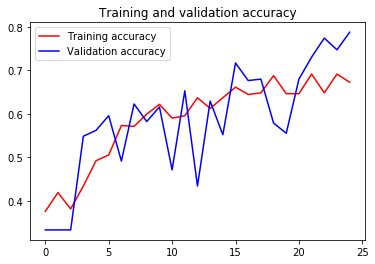

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


MessageError: ignored